In [1]:
import glob
import pandas as pd
import numpy as np
from datetime import datetime

## ABOUT THE BEIJING TAXI DATA SET :

### There are 30 Directories representing data of 30 days,in each directory there are 290 text Files that contains the Geospatial data.

### The features are : ( Longitude, Latitude, time(YYYYMMDDHHMMSS), speed(km/h), direction(degree from ture north)



### For experimentation I am using the data of Day 1 and 100 Taxi's (i.e 100 Text files)

In [2]:
taxi_files=[item for item in (glob.glob('Beijing_taxi_data/1/*.txt'))]   
len(taxi_files)

288

In [3]:
taxi_files[0]

#CData_20111101000000.txt

'Beijing_taxi_data/1/CData_20111101010500.txt'

In [4]:
col=['longitude','latitude','time','speed','direction']

In [5]:
total_days=30
taxi_files=[]
for item in range(total_days):
    taxi_files+=glob.glob('Beijing_taxi_data/{0}/*.txt'.format(item))
    
len(taxi_files)

8352

In [6]:
#allfiles = glob.glob('C:/example_folder/*.csv')
df = pd.concat((pd.read_csv(item,names=col,header=None,sep=' ') for item in taxi_files[0:70])) 

In [7]:
df.head()

,longitude,latitude,time,speed,direction
0,116.303913,39.939207,20111101010630,45,178
1,116.303926,39.938604,20111101010731,47,180
2,116.267906,39.906812,20111101010955,73,178
3,116.268172,39.907342,20111101010606,75,0
4,116.269191,39.919079,20111101010711,67,2


In [8]:
df.shape

(157266, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157266 entries, 0 to 1985
Data columns (total 5 columns):
longitude    157266 non-null float64
latitude     157266 non-null float64
time         157266 non-null int64
speed        157266 non-null int64
direction    157266 non-null int64
dtypes: float64(2), int64(3)
memory usage: 7.2 MB


In [10]:
#format of time is YYYYMMDDHHMMSS

In [11]:
# mydf['year'] = mydf['time'].dt.year

# mydf["time"] = pd.to_datetime(mydf["time"])

In [12]:
# mydf['year'] = mydf['time'].dt.year

In [13]:
temp_traj1=df.copy()

In [14]:
temp_traj1.head()

,longitude,latitude,time,speed,direction
0,116.303913,39.939207,20111101010630,45,178
1,116.303926,39.938604,20111101010731,47,180
2,116.267906,39.906812,20111101010955,73,178
3,116.268172,39.907342,20111101010606,75,0
4,116.269191,39.919079,20111101010711,67,2


In [15]:
abc=20111101010630   #yyyymmddhhmmss


# abc=abc.to_datetime(mydf["time"])
# print(type(abc))

temp_traj1.time = pd.to_datetime(temp_traj1.time.astype(str))

In [16]:
temp_traj1['hour']=temp_traj1['time'].dt.hour

In [17]:
temp_traj1.hour.value_counts()

15    18641
17    16286
8     13028
7     12670
16    11103
10    10361
14     9024
19     8742
13     8345
20     6696
9      6477
12     6095
23     4791
21     4404
0      3329
18     3307
1      2943
6      2771
11     2280
22     1809
3      1745
5      1347
4       687
2       385
Name: hour, dtype: int64

In [18]:
set(temp_traj1.hour.values)   #unique values (hours) in the current dataframe

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23}

In [19]:
temp_traj1.head()

,longitude,latitude,time,speed,direction,hour
0,116.303913,39.939207,2011-11-01 01:06:30,45,178,1
1,116.303926,39.938604,2011-11-01 01:07:31,47,180,1
2,116.267906,39.906812,2011-11-01 01:09:55,73,178,1
3,116.268172,39.907342,2011-11-01 01:06:06,75,0,1
4,116.269191,39.919079,2011-11-01 01:07:11,67,2,1


In [20]:
x_feature=temp_traj1.copy()
#X=pd.DataFrame([temp1.speed,temp1.hour],columns=x_col)

In [21]:
x_feature.head()

,longitude,latitude,time,speed,direction,hour
0,116.303913,39.939207,2011-11-01 01:06:30,45,178,1
1,116.303926,39.938604,2011-11-01 01:07:31,47,180,1
2,116.267906,39.906812,2011-11-01 01:09:55,73,178,1
3,116.268172,39.907342,2011-11-01 01:06:06,75,0,1
4,116.269191,39.919079,2011-11-01 01:07:11,67,2,1


In [22]:
x_feature.drop(['longitude','latitude','direction','time'],axis=1,inplace=True)

In [23]:



x_feature.head()

,speed,hour
0,45,1
1,47,1
2,73,1
3,75,1
4,67,1


### Now X_feature has speed and hour as the features,which will be used for clustering,but before clustering I am going to group the speed and hour.

### Criteria for speed is : 

### Range of speed :   #minimum speed = 0kph , maximum speed = 143kph

### (1) [0-65] means its a heavy traffic jam (High congestion)
### (2) [65-90] means its a medium traffic jam (Medium congestion)
### (3) [90-160] means its a No traffic congestion (Freeflow)

### Range of speed :   #minimum speed = 0kph , maximum speed = 160kph



### Criteria for hour is : 

### The day is divided into 4 segments
### 1)Morning (04:00-10:00)
### 2)Day_time (10:00-16:00)
### 3)Evening (16:00-22:00)
### 4)Night (22:00-04:00)


In [24]:
max(x_feature['speed'].unique())   #

160

In [25]:

# criteria_for_speed = [x_feature['speed'].between(0, 20), x_feature['speed'].between(20, 50)
#                       , x_feature['speed'].between(50, 143)]
# values_speed = [1, 2, 3]

# x_feature['speed'] = np.select(criteria_for_speed, values_speed, 0)  # the 3rd parameter is 0,it means if all case fails,
#                                                              # we have 0 inserted their


criteria_for_speed = [x_feature['speed'].between(0, 65), x_feature['speed'].between(65, 90)
                      , x_feature['speed'].between(90, 160)]
values_speed = [1, 2, 3]

x_feature['speed'] = np.select(criteria_for_speed, values_speed, 0)  # the 3rd parameter is 0,it means if all case fails,
                                                             # we have 0 inserted their

In [26]:
x_feature.head()

,speed,hour
0,1,1
1,1,1
2,2,1
3,2,1
4,2,1


In [27]:
x_feature['speed'].value_counts()

1    132364
2     24624
3       278
Name: speed, dtype: int64

In [28]:

# criteria_for_time = [x_feature['hour'].between(4, 10), x_feature['hour'].between(10, 16)
#                       , x_feature['hour'].between(16, 22),x_feature['hour'].between(22,24)]
# values_speed = [1, 2, 3]

# x_feature['speed'] = np.select(criteria_for_speed, values_speed, 0)  # the 3rd parameter is 0,it means if all case fails,
#                                                              # we have 0 inserted their

In [29]:
#(1) 5am to 7 am (morning) (2)7am to 9am(office time(morning) 

#,(3) 12 to 14 (afternoon).. (4) 16 to 18 (evening) and (5) 22 to 24 (night)


criteria_for_time = [x_feature['hour'].between(4, 11), # 1 for morning
                     x_feature['hour'].between(11, 16) # 2 for afternoon
                      , x_feature['hour'].between(16, 20),# 3 for evening 
                     (x_feature.hour.between(20,24) )|(x_feature.hour.between(0,5))] # 4 for night

values_speed = [1, 2, 3, 4]

x_feature['hour'] = np.select(criteria_for_time, values_speed, 0)  # the 3rd parameter is 0,it means 
                                                                 #if all case fails,
                                                             # we have 0 inserted their

In [30]:
x_feature['hour'].value_counts()

2    53208
1    49621
3    35031
4    19406
Name: hour, dtype: int64

In [31]:
# df.drop(df[df.score < 50].index, inplace=True)
x_feature.drop(x_feature[x_feature.hour==0].index,inplace=True)

In [32]:
x_feature['hour'].value_counts()

2    53208
1    49621
3    35031
4    19406
Name: hour, dtype: int64

In [33]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn.cluster import KMeans

In [34]:
feature=x_feature.copy()
feature.shape

(157266, 2)

In [35]:
feature.head()

,speed,hour
0,1,4
1,1,4
2,2,4
3,2,4
4,2,4


In [36]:
#feature.plot.scatter(x=feature['speed'], y=feature['hour'], marker=".")

In [37]:
#feature_1=([feature['speed'],feature['hour']])

In [38]:
#feature_1

In [39]:
# plt.scatter(feature_1[0],feature_1[1],s=15)  #same as i got in pandas dataframe
# plt.show()

In [40]:
clf=KMeans(n_clusters=3)

In [41]:
clf.fit(feature)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
centroids=clf.cluster_centers_
labels=clf.labels_

In [43]:
len(labels)

157266

In [44]:
type(labels)

numpy.ndarray

In [45]:
np.unique(labels)

array([0, 1, 2], dtype=int32)

In [46]:
feature['traffic_congestion_level']=labels

In [47]:
feature.head()

,speed,hour,traffic_congestion_level
0,1,4,1
1,1,4,1
2,2,4,1
3,2,4,1
4,2,4,1


In [48]:
feature['traffic_congestion_level'].value_counts()

1    54437
0    53208
2    49621
Name: traffic_congestion_level, dtype: int64

In [49]:
feature['traffic_congestion_level'].value_counts()

1    54437
0    53208
2    49621
Name: traffic_congestion_level, dtype: int64

In [50]:
cluster_result=feature.copy()

In [51]:
cluster_result['traffic_congestion_level'].value_counts()

1    54437
0    53208
2    49621
Name: traffic_congestion_level, dtype: int64

# Traffic Congestion Analysis and Prediction Results

In [52]:
cluster_result.groupby(['hour','speed']).sum()/cluster_result.shape[0]*100

#traffic congestion in percentage

#conclusion:
#in this dataset there is never high traffic congestion (heavy jam)



traffic_congestion_level
hour speed                          
1    1                     54.094337
     2                      8.930093
     3                      0.080119
2    1                      0.000000
     2                      0.000000
     3                      0.000000
3    1                     19.926112
     2                      2.329811
     3                      0.019076
4    1                      6.921394
     2                      5.315834
     3                      0.102374

In [ ]:
cluster_result.shape[0]

In [53]:
# for 30 taxi's of day 1..

In [54]:
cluster_result

,speed,hour,traffic_congestion_level
0,1,4,1
1,1,4,1
2,2,4,1
3,2,4,1
4,2,4,1
5,1,4,1
6,1,4,1
7,1,4,1
8,1,4,1
9,1,4,1


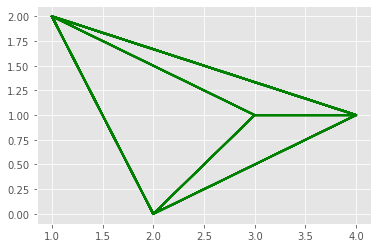

In [55]:
plt.plot(cluster_result['hour'], cluster_result['traffic_congestion_level'], color='green',linewidth=2)

In [56]:
cluster_result.head()

,speed,hour,traffic_congestion_level
0,1,4,1
1,1,4,1
2,2,4,1
3,2,4,1
4,2,4,1


In [57]:
df.head()

,longitude,latitude,time,speed,direction
0,116.303913,39.939207,20111101010630,45,178
1,116.303926,39.938604,20111101010731,47,180
2,116.267906,39.906812,20111101010955,73,178
3,116.268172,39.907342,20111101010606,75,0
4,116.269191,39.919079,20111101010711,67,2


In [58]:
cluster_result

,speed,hour,traffic_congestion_level
0,1,4,1
1,1,4,1
2,2,4,1
3,2,4,1
4,2,4,1
5,1,4,1
6,1,4,1
7,1,4,1
8,1,4,1
9,1,4,1


In [59]:
temp12=cluster_result.copy()

In [60]:
temp12.head()

,speed,hour,traffic_congestion_level
0,1,4,1
1,1,4,1
2,2,4,1
3,2,4,1
4,2,4,1


In [61]:
abcd=pd.concat([df, temp12], ignore_index=True)

/home/batsman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [62]:
temp12['latitude']=df['latitude']
temp12['longitude']=df['longitude']
temp12['direction']=df['direction']

In [63]:
temp12.head()

,speed,hour,traffic_congestion_level,latitude,longitude,direction
0,1,4,1,39.939207,116.303913,178
1,1,4,1,39.938604,116.303926,180
2,2,4,1,39.906812,116.267906,178
3,2,4,1,39.907342,116.268172,0
4,2,4,1,39.919079,116.269191,2


In [64]:
temp12.shape

(157266, 6)

In [65]:
temp12['traffic_congestion_level'].value_counts()

1    54437
0    53208
2    49621
Name: traffic_congestion_level, dtype: int64

In [66]:
temp12.head()

,speed,hour,traffic_congestion_level,latitude,longitude,direction
0,1,4,1,39.939207,116.303913,178
1,1,4,1,39.938604,116.303926,180
2,2,4,1,39.906812,116.267906,178
3,2,4,1,39.907342,116.268172,0
4,2,4,1,39.919079,116.269191,2


In [67]:
temp12['speed'].value_counts()

1    132364
2     24624
3       278
Name: speed, dtype: int64

In [68]:
temp12['speed'].value_counts()

1    132364
2     24624
3       278
Name: speed, dtype: int64

In [69]:
temp12['hour'].value_counts()

2    53208
1    49621
3    35031
4    19406
Name: hour, dtype: int64

In [70]:
classification_dataset=temp12.copy()

In [71]:
classification_dataset.head()

,speed,hour,traffic_congestion_level,latitude,longitude,direction
0,1,4,1,39.939207,116.303913,178
1,1,4,1,39.938604,116.303926,180
2,2,4,1,39.906812,116.267906,178
3,2,4,1,39.907342,116.268172,0
4,2,4,1,39.919079,116.269191,2


In [72]:
classification_dataset.drop(columns=['speed','hour'],inplace=True)  #so that real speed and hour values 
                                                                    # be assigned back for prediction

In [73]:
classification_dataset.head()

,traffic_congestion_level,latitude,longitude,direction
0,1,39.939207,116.303913,178
1,1,39.938604,116.303926,180
2,1,39.906812,116.267906,178
3,1,39.907342,116.268172,0
4,1,39.919079,116.269191,2


In [74]:
classification_dataset['hour']=temp_traj1['hour']

In [75]:
classification_dataset['speed']=temp_traj1['speed']

In [76]:
classification_dataset.head()

,traffic_congestion_level,latitude,longitude,direction,hour,speed
0,1,39.939207,116.303913,178,1,45
1,1,39.938604,116.303926,180,1,47
2,1,39.906812,116.267906,178,1,73
3,1,39.907342,116.268172,0,1,75
4,1,39.919079,116.269191,2,1,67


In [77]:
classification_dataset.head()

,traffic_congestion_level,latitude,longitude,direction,hour,speed
0,1,39.939207,116.303913,178,1,45
1,1,39.938604,116.303926,180,1,47
2,1,39.906812,116.267906,178,1,73
3,1,39.907342,116.268172,0,1,75
4,1,39.919079,116.269191,2,1,67


In [78]:
classification_dataset.head()

,traffic_congestion_level,latitude,longitude,direction,hour,speed
0,1,39.939207,116.303913,178,1,45
1,1,39.938604,116.303926,180,1,47
2,1,39.906812,116.267906,178,1,73
3,1,39.907342,116.268172,0,1,75
4,1,39.919079,116.269191,2,1,67


# Exporting the file for Visualization and Mapping

In [79]:
classification_dataset.to_csv('final_dataset_latest_1', sep=',', encoding='utf-8')

In [80]:
y_data=classification_dataset['traffic_congestion_level'].values

x_data=classification_dataset[['speed','hour','latitude','longitude','direction']].values
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(x_data, y_data, test_size=0.8, random_state=3)

from sklearn.tree import DecisionTreeClassifier
congestion_pred = DecisionTreeClassifier(criterion="entropy")
congestion_pred.fit(X_trainset,y_trainset)
predTree = congestion_pred.predict(X_testset)
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  1.0


In [81]:
classification_dataset.head()

,traffic_congestion_level,latitude,longitude,direction,hour,speed
0,1,39.939207,116.303913,178,1,45
1,1,39.938604,116.303926,180,1,47
2,1,39.906812,116.267906,178,1,73
3,1,39.907342,116.268172,0,1,75
4,1,39.919079,116.269191,2,1,67


In [82]:
y_data2=classification_dataset['traffic_congestion_level'].values

x_data2=classification_dataset[['speed','hour','latitude','longitude','direction']].values